# **LAB: Linear Regression - Polynomial Regression**
**Estimated time**: 30 minutes

## **Objectives**
After completing this lab, you will be able to:

- Develop **Linear Regression** and **Polynomial Regression** models

## **Overview**
In this section, we will develop two types of models—**Linear Regression** and **Polynomial Regression**—to predict the price of a car using different variables or features. These models will provide an estimate, helping us get an objective idea of how much a car should cost.

### **Some key questions to consider in this lab:**
- Is the dealer offering a fair trade-in value for my car?
- Am I placing a fair value on my car?

In data analytics, **Linear Regression** and **Polynomial Regression** are frequently used to predict future observations based on existing data. These models help us understand the relationships between variables and how these relationships can be used to predict outcomes.

### **Steps**

#### **1. Set up the working environment**
- Import the necessary libraries:



In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
install.packages("dplyr")
install.packages("ggplot2")
install.packages("scipy")
install.packages("caret")
install.packages("seaborn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘scipy’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘seaborn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)          # Hỗ trợ trong việc xử lý dữ liệu như numpy trong python
library(readr)

# Tắt các cảnh báo
options(warn = -1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




This function will download the dataset into your browser


In [3]:
# Sử dụng thư viện httr để tải file từ URL
library(httr)

In [4]:
#This function will download the dataset into your browser

download <- function(url, filename) {
  # Gửi yêu cầu GET đến URL
  response <- GET(url)

  # Kiểm tra nếu yêu cầu thành công (status code 200)
  if (status_code(response) == 200) {
    # Ghi nội dung vào tệp tin
    writeBin(content(response, "raw"), filename)
    message("Download successful: ", filename)
  } else {
    message("Download failed with status: ", status_code(response))
  }
}


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


you will need to download the dataset; if you are running locally, please comment out the following


In [5]:
#you will need to download the dataset; if you are running locally, please comment out the following
# Sử dụng download.file để tải xuống tập dữ liệu
download.file(
  url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv",
  destfile = "automobileEDA.csv",
  mode = "wb"
)

# Kiểm tra nếu tệp đã được tải thành công
if (file.exists("automobileEDA.csv")) {
  message("Download successful: automobileEDA.csv")
} else {
  message("Download failed.")
}


Download successful: automobileEDA.csv



Load the data and store it in dataframe `df`:


In [6]:
# Đọc dữ liệu
df <- read.csv("automobileEDA.csv")

# Hiển thị 6 dòng dữ liệu đầu tiên
head(df, 6)


,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,13495,11.190476,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,16500,11.190476,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814,⋯,9.0,154,5000,19,26,16500,12.368421,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486305,⋯,10.0,102,5500,24,30,13950,9.791667,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486305,⋯,8.0,115,5500,18,22,17450,13.055556,Medium,0,1
6,2,122,audi,std,two,sedan,fwd,front,99.8,0.8519942,⋯,8.5,110,5500,19,25,15250,12.368421,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>


# **1. Linear Regression and Multiple Linear Regression**

## **Linear Regression**

One example of a Data Model that we will be using is:

### **Simple Linear Regression**

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (Y), which is what we want to predict.

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

### **Notation**
$$
Y: \text{Response Variable} \\
X: \text{Predictor Variables}
$$

### **Linear Function**
$$
\hat{Y} = a + bX
$$
- **a** refers to the intercept of the regression line, i.e., the value of **Y** when **X** is 0.
- **b** refers to the slope of the regression line, i.e., the change in **Y** when **X** increases by 1 unit.

### Let's load the modules for linear regression and create the linear regression object:




<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


# **Building a Linear Regression Model**

We will create a linear regression model to predict car price based on highway miles per gallon (mpg). After fitting the model, review the summary of the model, which includes key information such as the coefficients, R-squared value, and p-values.

### **Questions for Evaluation:**

1. What is the coefficient for the `highway.mpg` variable? How does it relate to the price of the car?
2. What is the intercept, and what does it represent in the context of the model?
3. How do you interpret the R-squared value? Does the model explain a significant amount of variance in the price?
4. Based on the p-value, is the `highway.mpg` variable statistically significant in predicting car price?
5. What other factors might you consider adding to improve the model's predictive power?


In [7]:
# Create a linear regression model (price ~ highway.mpg)
lm_model <- lm(price ~ highway.mpg, data = df)

# View the summary of the model
summary(lm_model)



Call:
lm(formula = price ~ highway.mpg, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8647  -3411  -1102   1092  20970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38423.31    1843.39   20.84   <2e-16 ***
highway.mpg  -821.73      58.65  -14.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5653 on 199 degrees of freedom
Multiple R-squared:  0.4966,	Adjusted R-squared:  0.4941 
F-statistic: 196.3 on 1 and 199 DF,  p-value: < 2.2e-16


### **Questions for Evaluation:**

1. What is the coefficient for the `highway.mpg` variable? How does it relate to the price of the car?
2. What is the intercept, and what does it represent in the context of the model?
3. How do you interpret the R-squared value? Does the model explain a significant amount of variance in the price?
4. Based on the p-value, is the `highway.mpg` variable statistically significant in predicting car price?
5. What other factors might you consider adding to improve the model's predictive power?

1. The coefficient for highway.mpg is -821.73. This means that for each additional mile per gallon on the highway, the car price decreases by approximately $821.73.

2. The intercept is $38,423.31. This is the estimated car price when highway.mpg is 0. While this value doesn't make practical sense (since a car cannot have 0 mpg), it’s required mathematically in the model.

3. The R-squared value is 0.4966, meaning the model explains about 49.66% of the variance in car prices based on highway.mpg. While it explains a fair portion, there’s still a large amount of variability not captured by this model.

4. Yes, the p-value for highway.mpg is < 2e-16, which is extremely small and indicates that highway.mpg is statistically significant in predicting car prices.

5. Improve the model by adding other variables like horsepower, engine size, make, or body style, which might better capture the variation in car prices and improve predictive accuracy.

Fit the linear model using highway-mpg:


We can output a prediction:


In [8]:
# Generate predictions
yhat <- predict(lm_model, df)

# Display the first 5 predicted values
head(yhat, 5)


1        2        3        4        5 
16236.50 16236.50 17058.24 13771.30 20345.17

<h4>What is the value of the intercept (a)?</h4>


In [9]:
# Get the intercept (a)
intercept <- coef(lm_model)[1] 
print(paste("Intercept:", intercept))


[1] "Intercept: 38423.3058581574"


<h4>What is the value of the slope (b)?</h4>


In [10]:
# Get the slope (b)
slope <- coef(lm_model)[2] 
print(paste("Slope:", slope))


[1] "Slope: -821.733378321926"


In [11]:
# Print the regression equation
cat("Price =", round(intercept, 2), "+", "______", "x highway-mpg\n")


Price = 38423.31 + ______ x highway-mpg


### **What is the final estimated linear model we get?**

After reviewing the model summary, the final estimated linear regression equation can be expressed in the form:

$$
\hat{Y} = a + bX
$$

Where:
- **a** is the intercept (the predicted price when `highway.mpg` is 0).
- **b** is the coefficient of `highway.mpg` (how much the price changes for each unit increase in `highway.mpg`).

### **Questions to consider:**
- Based on the summary, what are the specific values of **a** (intercept) and **b** (slope)?
- How would you describe the relationship between `highway.mpg` and `price` based on these values?


Plugging in the actual values we get:


<b>Price</b> =  38423.31 + -821.73 x highway-mpg</b>


1. The intercept (a) is 38423.31. The slope (b) is -821.73.

2. There is a negative relationship between highway.mpg and price. For every additional mile per gallon on the highway, the car's price decreases by approximately $821.73.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>
<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

</div>

</div>


In [16]:
# Based on the summary, find the slope (coefficient for engine.size) and intercept
# What is the regression equation? Fill in the blanks below:
# Create a linear regression model (price ~ engine.size)
lm_engine_size_model <- lm(price ~ engine.size, data = df)

# Get the intercept (a)
intercept <- coef(lm_engine_size_model)[1]

# Get the slope (b)
slope <- coef(lm_engine_size_model)[2]

# Print the regression equation
cat("Price =", round(intercept, 2), "+", round(slope, 2), "* engine.size\n")

#Price = intercept + slope × engine.size
#Price

Price = -7963.34 + 166.86 * engine.size


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 b:</h1>

<b>Find the slope and intercept of the model.</b>

</div>


<h4>Slope</h4>


In [17]:
# Write your code below and press Shift+Enter to execute
# Find the value of the slope (coefficient for engine.size)
slope_engine <- coef(lm_engine_size_model)[2]
slope_engine


engine.size 
     166.86

<h4>Intercept</h4>


In [19]:
# Write your code below and press Shift+Enter to execute
# Giá trị của hằng số (intercept)

intercept_engine <- coef(lm_engine_size_model)[1]
intercept_engine

(Intercept) 
  -7963.339

In [20]:
# Write your code below and press Shift+Enter to execute
# Find the value of the intercept (hint: use coef(lm1)[1])

# Now print the regression equation
cat("Price =", round(intercept_engine, 2), "+",
    round(slope_engine, 2), "x engine-size\n")


Price = -7963.34 + 166.86 x engine-size


In [22]:
# Tính giá dự đoán
price_predicted <- predict(lm_engine_size_model, df)
head(price_predicted)

1        2        3        4        5        6 
13728.46 13728.46 17399.38 10224.40 14729.62 14729.62

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>

</div>


Price = -7963.34 + 166.86 * engine.size


[1] 13728.46 13728.46 17399.38 10224.40 14729.62 14729.62

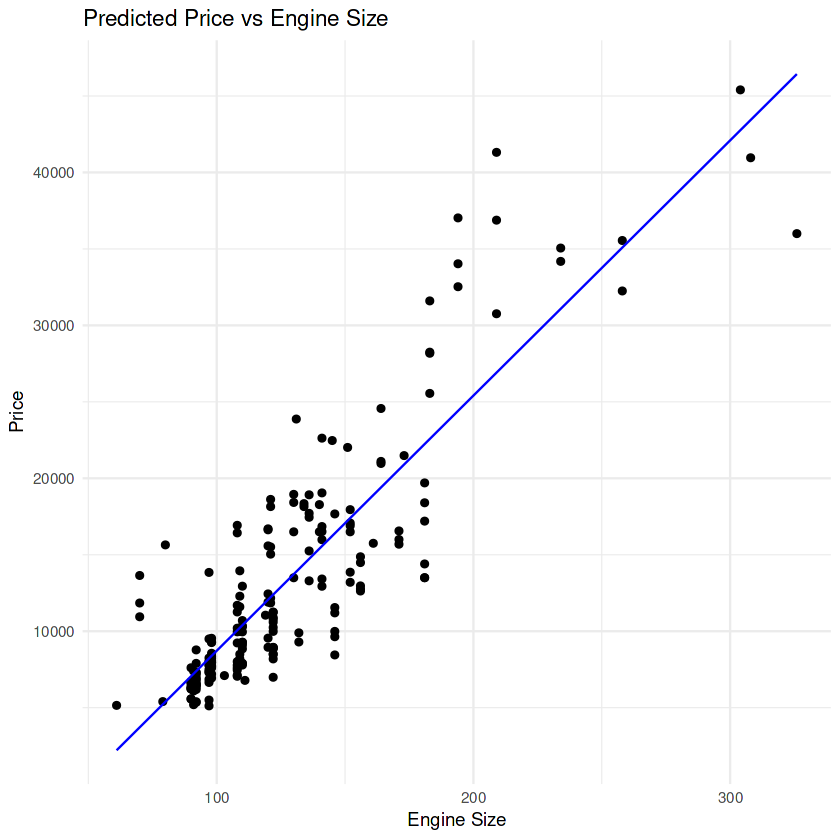

In [23]:
# Write your code below and press Shift+Enter to execute

# Define X using df$engine.size
X <- df$engine.size  # Fill in this part

# Calculate predictions using X
Yhat <- intercept + slope * X

# Print the prediction equation
cat("Price =", round(intercept, 2), "+", round(slope, 2), "* engine.size\n")

# Check the predicted results
head(Yhat)

# Plot to illustrate
ggplot(df, aes(x = engine.size, y = price)) +
  geom_point() +  # Scatter plot of actual data
  geom_line(aes(y = Yhat), color = 'blue') +  # Predicted line
  labs(title = "Predicted Price vs Engine Size",
       x = "Engine Size",
       y = "Price") +
  theme_minimal()

In [25]:

# Create a new data frame to display actual and predicted prices
results <- data.frame(
  Engine_Size = df$engine.size,
  Actual_Price = df$price,
  Predicted_Price = Yhat
)

# Display the first few rows of the results
head(results)

# Print the predicted prices
print(results)

,Engine_Size,Actual_Price,Predicted_Price
,<int>,<dbl>,<dbl>
1,130,13495,13728.46
2,130,16500,13728.46
3,152,16500,17399.38
4,109,13950,10224.40
5,136,17450,14729.62
6,136,15250,14729.62


    Engine_Size Actual_Price Predicted_Price
1           130        13495       13728.463
2           130        16500       13728.463
3           152        16500       17399.383
4           109        13950       10224.403
5           136        17450       14729.623
6           136        15250       14729.623
7           136        17710       14729.623
8           136        18920       14729.623
9           131        23875       13895.323
10          108        16430       10057.543
11          108        16925       10057.543
12          164        20970       19401.704
13          164        21105       19401.704
14          164        24565       19401.704
15          209        30760       26910.404
16          209        41315       26910.404
17          209        36880       26910.404
18           61         5151        2215.122
19           90         6295        7054.063
20           90         6575        7054.063
21           90         5572        7054.063
22        

### **Multiple Linear Regression**

#### **What if we want to predict car price using more than one variable?**

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.

Multiple Linear Regression is similar to Simple Linear Regression, but it explains the relationship between one continuous response (dependent) variable and **two or more** predictor (independent) variables. Most real-world regression models involve multiple predictors. We will demonstrate the structure using four predictor variables, but the results can generalize to any number of predictors:

$$
Y: \text{Response Variable} \\
X_1: \text{Predictor Variable 1} \\
X_2: \text{Predictor Variable 2} \\
X_3: \text{Predictor Variable 3} \\
X_4: \text{Predictor Variable 4}
$$

Where:
- **a**: intercept
- **b₁**: coefficient of Variable 1
- **b₂**: coefficient of Variable 2
- **b₃**: coefficient of Variable 3
- **b₄**: coefficient of Variable 4

The equation for the Multiple Linear Regression model is given by:

$$
\hat{Y} = a + b₁ X₁ + b₂ X₂ + b₃ X₃ + b₄ X₄
$$

#### **Predictors for Car Price**

From the previous analysis, we know that good predictors of car price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictors.



In [26]:
# Tạo mô hình hồi quy đa biến price ~ horsepower + curb.weight + engine.size + highway.mpg

multi_model <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Xem tóm tắt mô hình
summary(multi_model)


Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15806.625   4388.993  -3.601 0.000401 ***
horsepower      53.496     14.727   3.632 0.000358 ***
curb.weight      4.708      1.119   4.207 3.94e-05 ***
engine.size     81.530     14.064   5.797 2.66e-08 ***
highway.mpg     36.057     74.167   0.486 0.627390    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Fit the linear model using the four above-mentioned variables.


In [27]:
# Tạo dự đoán
y_pred <- predict(multi_model, df)
head(y_pred)

1        2        3        4        5        6 
13699.11 13699.11 19051.65 10620.36 15521.31 13869.67

What is the value of the intercept(a)?


In [28]:
# Lấy giá trị intercept
multi_intercept <- coef(multi_model)[1]  # The first coefficient is the intercept
print(paste("Intercept:", multi_intercept))

[1] "Intercept: -15806.6246263292"


What are the values of the coefficients (b1, b2, b3, b4)?


In [29]:
# Lấy các hệ số
coefficients <- coef(multi_model)  # Get the coefficients from the model

# Names of the predictors (excluding intercept)
names_predictors <- names(coefficients)[-1]  # Exclude the intercept

# Print the coefficients for each predictor
for (i in 1:length(names_predictors)) {
    print(paste(names_predictors[i], "coefficient:", coefficients[i + 1]))  # i + 1 to skip intercept
}

[1] "horsepower coefficient: 53.4957442260494"
[1] "curb.weight coefficient: 4.70770099461394"
[1] "engine.size coefficient: 81.5302638212274"
[1] "highway.mpg coefficient: 36.0574888164858"


In [30]:
# Lấy các hệ số
coefficients <- coef(multi_model)  # Get the coefficients from the model

# Lấy giá trị intercept
multi_intercept <- coefficients[1]  # The first coefficient is the intercept

# Names of the predictors
names_predictors <- names(coefficients)[-1]  # Exclude the intercept

# In ra phương trình hồi quy
cat("Phương trình hồi quy: \n")
equation <- paste("Price =", round(multi_intercept, 2), 
                  "+", round(coefficients[2], 2), "* horsepower",
                  "+", round(coefficients[3], 2), "* curb.weight",
                  "+", round(coefficients[4], 2), "* engine.size",
                  "+", round(coefficients[5], 2), "* highway.mpg")
cat(equation, "\n\n")

# In ra các hệ số của từng biến
cat("Hệ số của từng biến:\n")
for (i in 1:length(names_predictors)) {
    cat(names_predictors[i], "coefficient:", round(coefficients[i + 1], 2), "\n")  # i + 1 to skip intercept
}

Phương trình hồi quy: 
Price = -15806.62 + 53.5 * horsepower + 4.71 * curb.weight + 81.53 * engine.size + 36.06 * highway.mpg 

Hệ số của từng biến:
horsepower coefficient: 53.5 
curb.weight coefficient: 4.71 
engine.size coefficient: 81.53 
highway.mpg coefficient: 36.06 


### **Final Estimated Linear Model**

From the results of the Multiple Linear Regression, we derived the following regression equation for predicting the car price:

**Price** = -15806.62 + 53.5 * horsepower + 4.71 * curb.weight + 81.53 * engine.size + 36.06 * highway.mpg

#### **Intercept and Coefficients:**
- **Intercept (a)** = -15806.62: This is the value of the car price when all predictor variables are 0.
- **horsepower (b₁)** = 53.5: For every 1-unit increase in horsepower, the car price increases by 53.5 units, holding all other variables constant.
- **curb.weight (b₂)** = 4.71: For every 1-unit increase in curb weight, the car price increases by 4.71 units, holding all other variables constant.
- **engine.size (b₃)** = 81.53: For every 1-unit increase in engine size, the car price increases by 81.53 units, holding all other variables constant.
- **highway.mpg (b₄)** = 36.06: For every 1-unit increase in highway miles per gallon (MPG), the car price increases by 36.06 units, holding all other variables constant.

#### **Final Linear Function**

The final linear function we obtained in this example is:

$$
\hat{Y} = -15806.62 + 53.5 \times X_1 + 4.71 \times X_2 + 81.53 \times X_3 + 36.06 \times X_4
$$

Where:
- \( X_1 \): horsepower
- \( X_2 \): curb weight
- \( X_3 \): engine size
- \( X_4 \): highway mpg

This equation allows us to estimate the car price based on these four predictors.


### Question #2 a): Creating and Training a Multiple Linear Regression Model

Create and train a Multiple Linear Regression model named **"lm2"** where the response variable is `price`, and the predictor variables are `normalized.losses` and `highway.mpg`.

Here’s how we can build the model:

In [31]:
# Write your code below and press Shift+Enter to execute
# Tạo mô hình với normalized-losses và highway-mpg
lm2 <- lm(price ~ normalized.losses + highway.mpg, data = df)

# In hệ số
coefficients_lm2 <- coef(lm2)
print(coefficients_lm2)


      (Intercept) normalized.losses       highway.mpg 
     38201.313272          1.497896       -820.454340 


## Question #2 b): Finding the Coefficients of the Model
After training the model, we can find the coefficients (the intercept and the coefficients for the predictor variables). These coefficients tell us how much the response variable (price) changes with a one-unit change in each predictor variable (normalized.losses and highway.mpg).


In [32]:
# Write your code below and press Shift+Enter to execute
# Lấy giá trị intercept
intercept_lm2 <- coef(lm2)[1]  # The first coefficient is the intercept
print(paste("Intercept:", intercept_lm2))

[1] "Intercept: 38201.3132724573"


In [33]:
# Lấy các hệ số
coefficients_lm2 <- coef(lm2)  # Get all coefficients
names(coefficients_lm2) <- c("Intercept", "Normalized Losses", "Highway MPG")  # Assign names for clarity

# Print each coefficient
for (i in 1:length(coefficients_lm2)) {
  print(paste(names(coefficients_lm2)[i], "coefficient:", round(coefficients_lm2[i], 2)))
}


[1] "Intercept coefficient: 38201.31"
[1] "Normalized Losses coefficient: 1.5"
[1] "Highway MPG coefficient: -820.45"


## **2. Model Evaluation Using Visualization**

Now that we've developed some models, how do we evaluate them and choose the best one? One effective way to assess the performance of a model is through **visualization**.

Visualizations can help us:
- Understand the accuracy of the model.
- Compare the predicted values to the actual values.
- Identify any patterns or inconsistencies in the model's predictions.

### **Residual Plot**
A residual plot is a useful tool for evaluating the fit of a regression model. It shows the residuals (the difference between actual and predicted values) on the y-axis and the predicted values on the x-axis.

- **Good fit**: Residuals are randomly scattered around 0 without any clear pattern.
- **Bad fit**: Residuals show a pattern, indicating that the model may not be capturing all aspects of the relationship.

Here’s how we can create a residual plot:

```r
# Create residuals from the model
residuals <- lm2$residuals

# Create a scatter plot of residuals vs fitted values
plot(lm2$fitted.values, residuals,
     xlab = 'Fitted Values',
     ylab = 'Residuals',
     main = 'Residual Plot')

# Add a horizontal line at 0
abline(h = 0, col = "red", lwd = 2)


Style 1

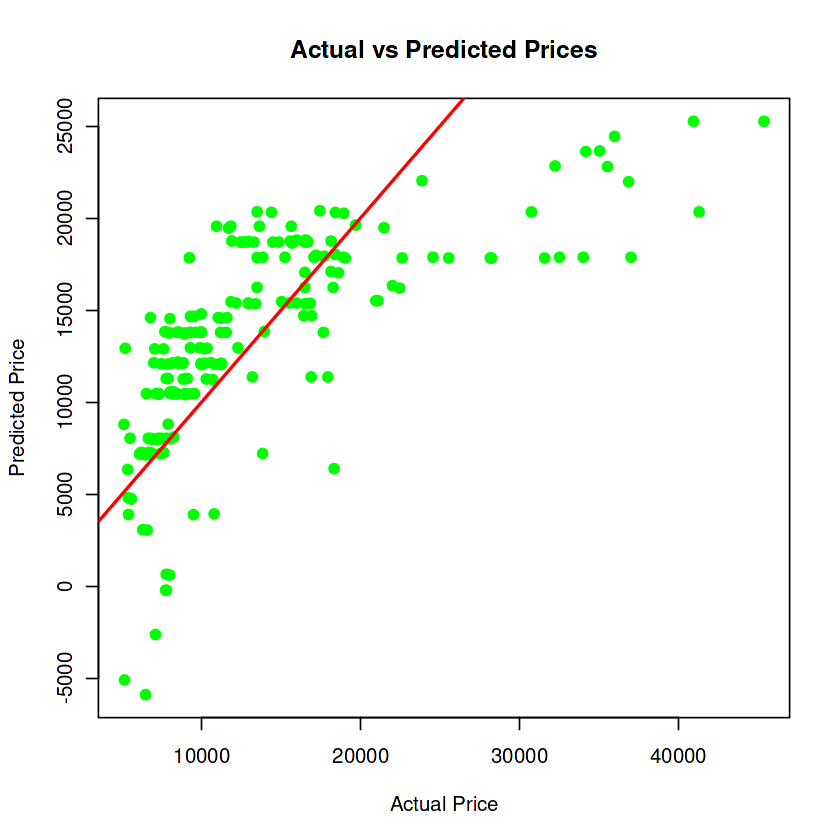

In [34]:
# Create a data frame with actual and predicted values
predicted_values <- lm2$fitted.values  # Predicted values
actual_values <- df$price  # Actual values

comparison_df <- data.frame(Actual = actual_values, Predicted = predicted_values)
# Plot the actual vs predicted distributions
plot(comparison_df$Actual, comparison_df$Predicted,
     xlab = 'Actual Price',
     ylab = 'Predicted Price',
     main = 'Actual vs Predicted Prices',
     pch = 19,  # Point type
     col = 'green')
# Add a diagonal line (y = x) to indicate perfect prediction
abline(0, 1, col = "red", lwd = 2)  # Diagonal line

Style 2

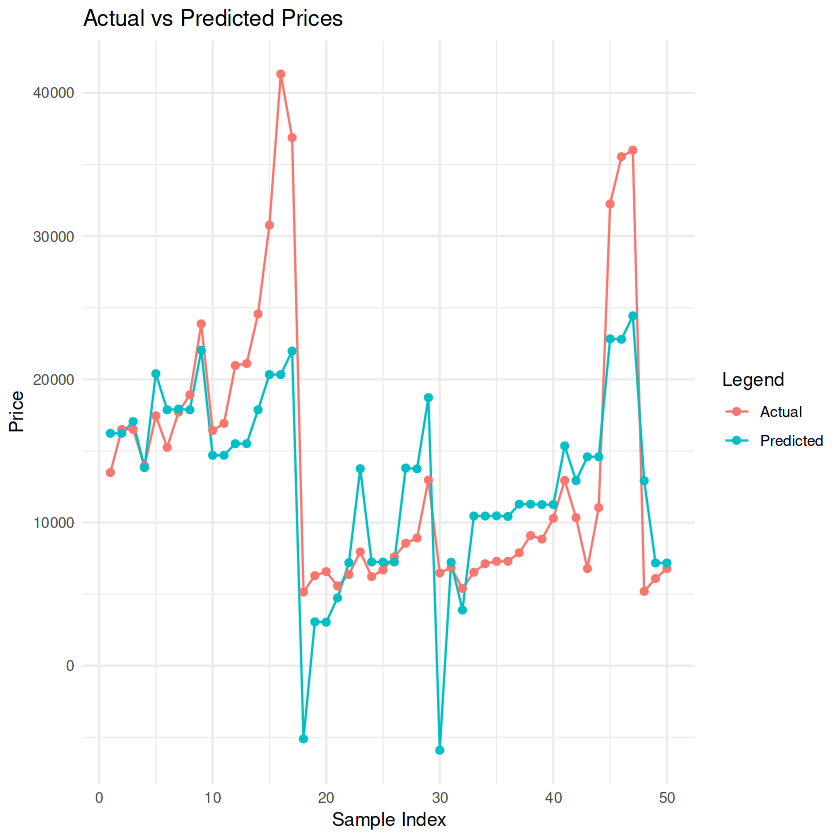

In [35]:
# Tạo data frame với 50 mẫu đầu tiên
comparison_df <- data.frame(
  Actual = df$price[1:50],
  Predicted = predict(lm2)[1:50]
)

# Thêm cột index
comparison_df$Index <- 1:50

# Chuyển đổi data format
comparison_long <- tidyr::pivot_longer(comparison_df, cols = c("Actual", "Predicted"), names_to = "Type", values_to = "Price")


# Vẽ biểu đồ đường
ggplot(comparison_long, aes(x = Index, y = Price, color = Type)) +
  geom_line() +
  geom_point() +
  labs(title = "Actual vs Predicted Prices",
       x = "Sample Index",
       y = "Price",
       color = "Legend") +
  theme_minimal()

Style 3

In [36]:
# Load required libraries
library(ggplot2)
library(stats)

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:


`geom_smooth()` using formula = 'y ~ x'


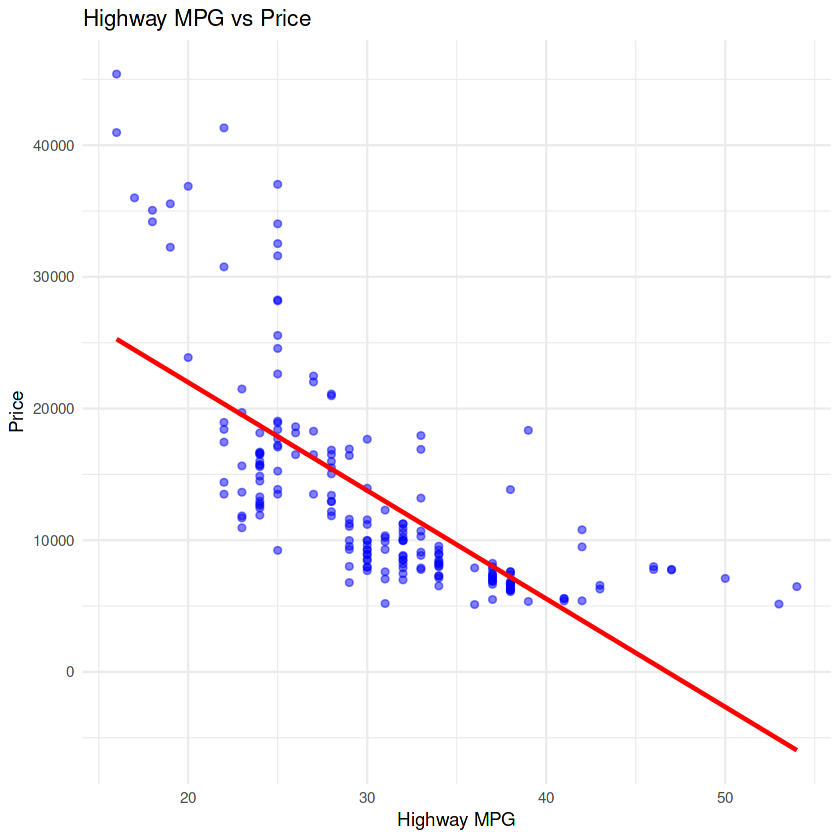

In [37]:
# Visualize highway-mpg vs price

ggplot(df, aes(x = highway.mpg, y = price)) +
  geom_point(color = 'blue', alpha = 0.5) +  # Scatter points
  geom_smooth(method = 'lm', color = 'red', se = FALSE) +  # Fitted line
  labs(title = "Highway MPG vs Price",
       x = "Highway MPG",
       y = "Price") +
  theme_minimal()  # Clean theme for the plot

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


`geom_smooth()` using formula = 'y ~ x'


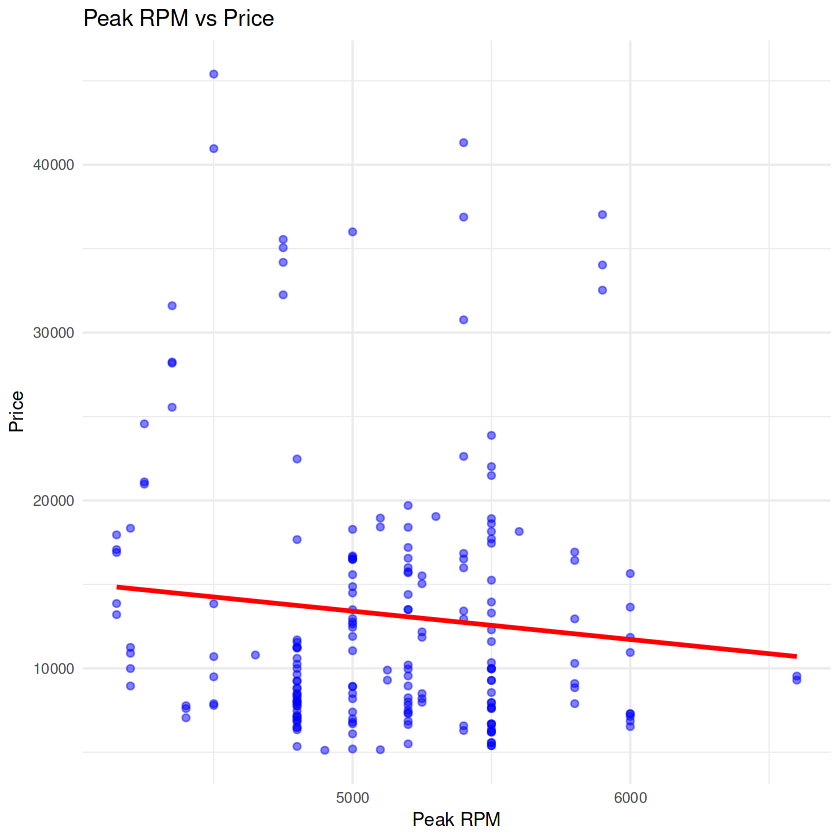

In [38]:
# Visualize peak-rpm vs price
ggplot(df, aes(x = peak.rpm, y = price)) +
  geom_point(color = 'blue', alpha = 0.5) +  # Scatter points
  geom_smooth(method = 'lm', color = 'red', se = FALSE) +  # Fitted line
  labs(title = "Peak RPM vs Price",
       x = "Peak RPM",
       y = "Price") +
  theme_minimal()  # Clean theme for the plot

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [39]:
# Write your code below and press Shift+Enter to execute
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

# Calculate correlations
cor_matrix <- cor(df[c("peak.rpm", "highway.mpg", "price")])
print(cor_matrix)

               peak.rpm highway.mpg      price
peak.rpm     1.00000000 -0.05859759 -0.1016159
highway.mpg -0.05859759  1.00000000 -0.7046923
price       -0.10161587 -0.70469227  1.0000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


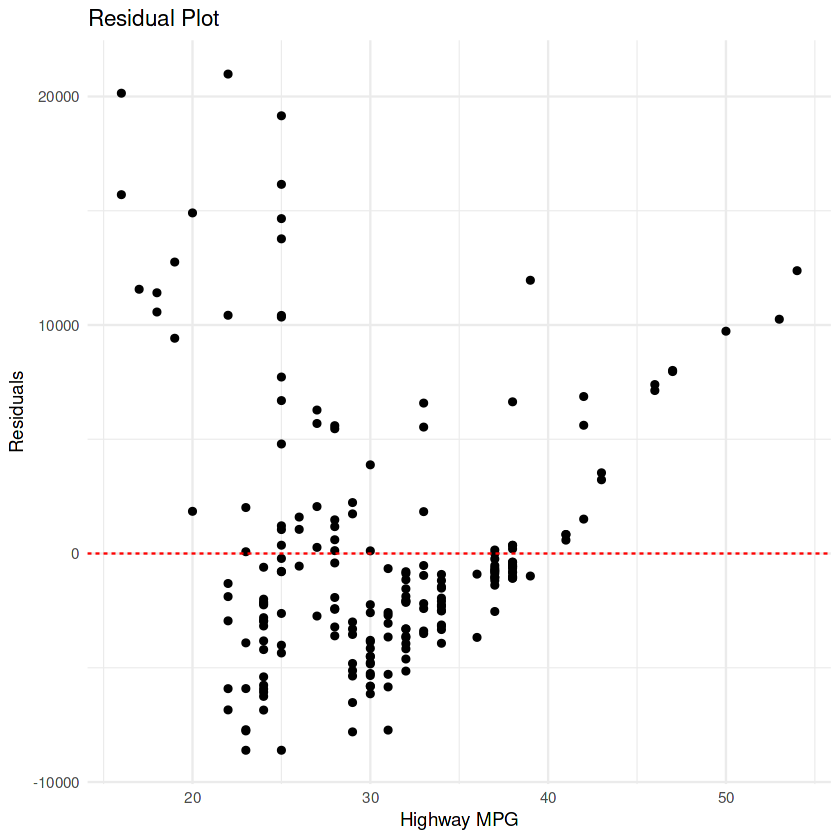

In [40]:
# Calculate residuals from the model
residuals <- lm2$residuals

# Create a data frame for plotting
residuals_df <- data.frame(Highway_MPG = df$highway.mpg, Residuals = residuals)

# Create the residual plot
ggplot(residuals_df, aes(x = Highway_MPG, y = Residuals)) +
  geom_point() +
  labs(title = "Residual Plot",
       x = "Highway MPG",
       y = "Residuals") +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  theme_minimal()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [ ]:
library(tidyr)

In [41]:
# Distribution plot of actual vs fitted values

# Create a data frame with actual and fitted values
distribution_df <- data.frame(
  Actual = df$price,
  Fitted = predict(lm2)
)

# Gather the data for plotting
distribution_long <- gather(distribution_df, key = "Type", value = "Price", Actual, Fitted)



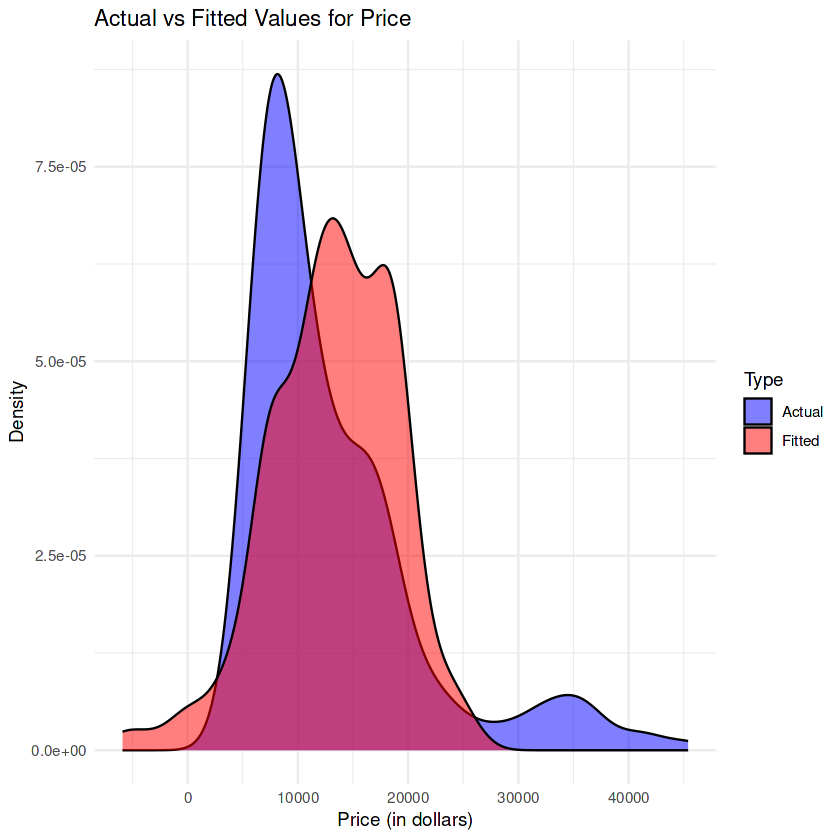

In [42]:

    # Create the distribution plot
ggplot(distribution_long, aes(x = Price, fill = Type)) +
  geom_density(alpha = 0.5) +  # Use density plots with transparency
  labs(title = "Actual vs Fitted Values for Price",
         x = "Price (in dollars)",
         y = "Density") +
  scale_fill_manual(values = c("Actual" = "blue", "Fitted" = "red")) + 
  theme_minimal()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [62]:
# Function để vẽ đồ thị đa thức
plot_polynomial <- function(x, y, degree) {
  # Create a data frame for plotting
  plot_data <- data.frame(x = x, y = y)

  # Fit the polynomial model
  poly_model <- lm(y ~ poly(x, degree, raw = TRUE), data = plot_data)

  # Generate predicted values for a smooth curve
  x_pred <- seq(min(x), max(x), length.out = 100)
  y_pred <- predict(poly_model, newdata = data.frame(x = x_pred))

  # Create the plot
  ggplot(plot_data, aes(x = x, y = y)) +
    geom_point(alpha = 0.5) +  # Scatter plot of original data
    geom_line(data = data.frame(x = x_pred, y = y_pred), color = "blue") +  # Polynomial curve
    labs(title = paste("Polynomial Fit (Degree =", degree, ")"),
         x = "x", y = "y") +
    theme_minimal()
}

Let's get the variables:


In [63]:
# Lấy các biến từ DataFrame
x <- df$`highway-mpg`
y <- df$price

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [64]:
# Here we use a polynomial of the 3rd order (cubic) price ~ poly(highway.mp
# Tạo mô hình đa thức bậc 3
cubic_model <- lm(price ~ poly(highway.mpg, 3, raw = TRUE), data = df)

# Xem tóm tắt mô hình
summary(cubic_model)


Call:
lm(formula = price ~ poly(highway.mpg, 3, raw = TRUE), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10149.0  -2083.7   -637.7    904.8  19591.3 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       137923.594  15416.845   8.946 2.71e-16 ***
poly(highway.mpg, 3, raw = TRUE)1  -8965.433   1444.082  -6.208 3.11e-09 ***
poly(highway.mpg, 3, raw = TRUE)2    204.754     43.564   4.700 4.88e-06 ***
poly(highway.mpg, 3, raw = TRUE)3     -1.557      0.423  -3.680 0.000301 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4571 on 197 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6692 
F-statistic: 135.9 on 3 and 197 DF,  p-value: < 2.2e-16


Let's plot the function:


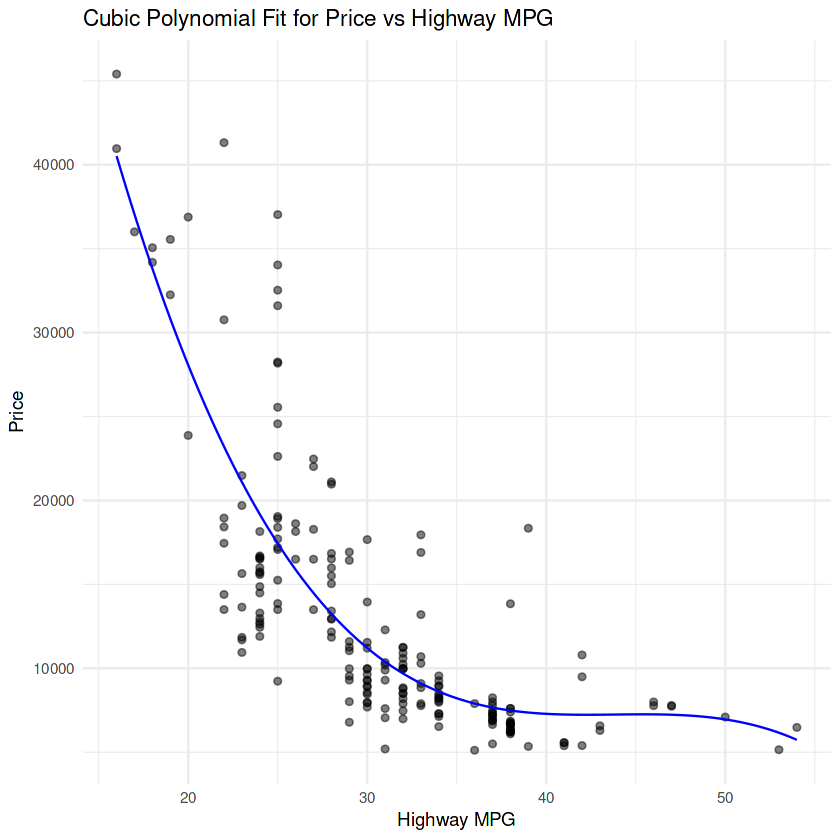

In [65]:
# Vẽ đồ thị cho mô hình bậc 3 df$highway.mpg, df$price
# Generate predicted values for a smooth curve
x_pred <- seq(min(df$highway.mpg), max(df$highway.mpg), length.out = 100)
y_pred <- predict(cubic_model, newdata = data.frame(highway.mpg = x_pred))

# Create the plot
ggplot(df, aes(x = highway.mpg, y = price)) +
  geom_point(alpha = 0.5) +  # Scatter plot of original data
  geom_line(data = data.frame(highway.mpg = x_pred, price = y_pred), color = "blue") +  # Polynomial curve
  labs(title = "Cubic Polynomial Fit for Price vs Highway MPG",
       x = "Highway MPG", y = "Price") +
  theme_minimal()

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [67]:
# Write your code below and press Shift+Enter to execute
# Tạo mô hình đa thức bậc 11 price ~ poly(highway.mpg
poly11_model <- lm(price ~ poly(highway.mpg, 11, raw = TRUE), data = df)

# Xem tóm tắt mô hình (optional)
summary(poly11_model)


Call:
lm(formula = price ~ poly(highway.mpg, 11, raw = TRUE), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8932.7 -2146.2  -575.4   885.6 21298.9 

Coefficients: (1 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)
(Intercept)                         -7.267e+07  7.308e+07  -0.994    0.321
poly(highway.mpg, 11, raw = TRUE)1   2.259e+07  2.456e+07   0.920    0.359
poly(highway.mpg, 11, raw = TRUE)2  -3.065e+06  3.643e+06  -0.841    0.401
poly(highway.mpg, 11, raw = TRUE)3   2.393e+05  3.143e+05   0.761    0.447
poly(highway.mpg, 11, raw = TRUE)4  -1.191e+04  1.748e+04  -0.682    0.496
poly(highway.mpg, 11, raw = TRUE)5   3.951e+02  6.546e+02   0.604    0.547
poly(highway.mpg, 11, raw = TRUE)6  -8.837e+00  1.674e+01  -0.528    0.598
poly(highway.mpg, 11, raw = TRUE)7   1.315e-01  2.887e-01   0.455    0.649
poly(highway.mpg, 11, raw = TRUE)8  -1.243e-03  3.216e-03  -0.387    0.699
poly(highway.mpg, 11, raw 

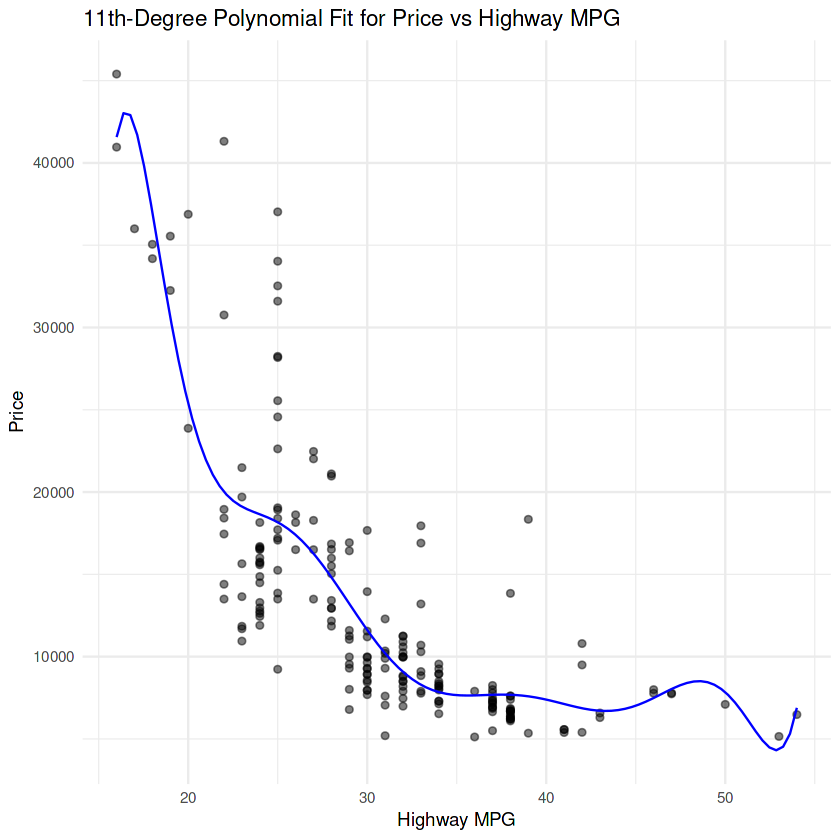

In [68]:
# Vẽ đồ thị cho mô hình bậc 11
x_pred <- seq(min(df$highway.mpg), max(df$highway.mpg), length.out = 100)
y_pred <- predict(poly11_model, newdata = data.frame(highway.mpg = x_pred))

# Create the plot
ggplot(df, aes(x = highway.mpg, y = price)) +
  geom_point(alpha = 0.5) +  # Scatter plot of original data
  geom_line(data = data.frame(highway.mpg = x_pred, price = y_pred), color = "blue") +  # Polynomial curve
  labs(title = "11th-Degree Polynomial Fit for Price vs Highway MPG",
       x = "Highway MPG", y = "Price") +
  theme_minimal()

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


We create a <b>PolynomialFeatures</b> object of degree 2:


In [69]:

# Tạo biến mới từ cột 'highway-mpg'
# df$highway_mpg <- df$`highway-mpg`

# Tạo ma trận Z với 4 biến độc lập
#chọn các biến: 'highway-mpg', 'curb-weight', 'engine-size', 'horsepower'
Z <- df[, c('highway.mpg', 'curb.weight', 'engine.size', 'horsepower')]



In the original data, there are 201 samples and 4 features.


In [70]:
# Kiểm tra kích thước và dữ liệu đầu vào
print(dim(Z))
head(Z)

[1] 201   4


,highway.mpg,curb.weight,engine.size,horsepower
,<int>,<int>,<int>,<dbl>
1,27,2548,130,111
2,27,2548,130,111
3,26,2823,152,154
4,30,2337,109,102
5,22,2824,136,115
6,25,2507,136,110


After the transformation, there are 201 samples and 11 features.


In [71]:
# Sử dụng model.matrix để tạo ma trận đa thức
Z_poly <- model.matrix(~ poly(highway.mpg, 3) + curb.weight + engine.size + horsepower, data = df)

# Kiểm tra kích thước của dữ liệu sau khi chuyển đổi
print(dim(Z_poly))
head(Z_poly)

[1] 201   7


,(Intercept),"poly(highway.mpg, 3)1","poly(highway.mpg, 3)2","poly(highway.mpg, 3)3",curb.weight,engine.size,horsepower
1,1,-0.038250026,-0.019416280,0.053108488,2548,130,111
2,1,-0.038250026,-0.019416280,0.053108488,2548,130,111
3,1,-0.048625539,-0.007041894,0.051701530,2823,152,154
4,1,-0.007123487,-0.044247860,0.035784204,2337,109,102
5,1,-0.090127592,0.062941611,-0.004641368,2824,136,115
6,1,-0.059001053,0.007381088,0.045778308,2507,136,110


<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [72]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [73]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [74]:
# Tải thư viện
library(dplyr)  # Thư viện để xử lý dữ liệu
library(tidyr)

### **Creating the Preprocessing Pipeline**

We create the pipeline by defining a list of transformations that will be applied to the data. This preprocessing step includes **data normalization**, where we center and scale the variables.

The pipeline standardizes the data by:
- **Centering**: Subtracting the mean value of each feature from the data points.
- **Scaling**: Dividing by the standard deviation to ensure all features are on a similar scale.

We apply the pipeline to the following features:
- `horsepower`
- `curb.weight`
- `engine.size`
- `highway.mpg`


In [75]:
# Tạo preprocessing pipeline
# Chuẩn hóa dữ liệu
preproc <- preProcess(df[, c("horsepower", "curb.weight", "engine.size", "highway.mpg")],
                     method = c("center", "scale"))

# Xem thông tin về pipeline
print(preproc)

Created from 201 samples and 4 variables

Pre-processing:
  - centered (4)
  - ignored (0)
  - scaled (4)



We input the list as an argument to the pipeline constructor:


In [76]:
# Áp dụng preprocessing
Z_scaled <- predict(preproc, newdata = as.data.frame(Z))

# Xem 5 hàng đầu tiên của Z_scaled
head(Z_scaled, 5)

,highway.mpg,curb.weight,engine.size,horsepower
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5409371,-0.01482064,0.07520135,0.20324699
2,-0.5409371,-0.01482064,0.07520135,0.20324699
3,-0.6876690,0.51678915,0.60472425,1.35403503
4,-0.1007413,-0.42271032,-0.43025232,-0.03761562
5,-1.2745966,0.51872227,0.21961669,0.31029704


### **Data Type Conversion and Normalization**

First, we convert the data type of **Z** to `float` to avoid any conversion warnings that may arise when using the `StandardScaler`, which requires float inputs.

Next, we normalize the data by centering and scaling it, and then simultaneously perform a transform and fit the model. This step ensures the data is ready for model training, preventing issues caused by different feature scales.


In [77]:
# Fit mô hình với dữ liệu đã chuẩn hóa
model_scaled <- lm(df$price ~ ., data = Z_scaled)

# Xem tóm tắt mô hình
summary(model_scaled)


Call:
lm(formula = df$price ~ ., data = Z_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13207.1      247.2  53.420  < 2e-16 ***
highway.mpg    245.7      505.5   0.486 0.627390    
curb.weight   2435.3      578.9   4.207 3.94e-05 ***
engine.size   3387.3      584.3   5.797 2.66e-08 ***
horsepower    1998.9      550.3   3.632 0.000358 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [78]:
# Tạo dự đoán
y_pred_pipeline <- predict(model_scaled, newdata = Z_scaled)

# Xem 4 dự đoán đầu tiên
head(y_pred_pipeline, 4)

1        2        3        4 
13699.11 13699.11 19051.65 10620.36

### **Question 5: Creating a Pipeline for Standardization and Linear Regression**

Create a pipeline that performs the following steps:
1. **Standardizes the data** using a preprocessing step.
2. **Trains a Linear Regression model** using the standardized features `Z` and target variable `y`.
3. **Produces predictions** based on the trained model.

The pipeline will ensure the data is normalized before fitting the model, improving the consistency of the results.



In [79]:
# Write your code below and press Shift+Enter to execute
# 1. Tạo preprocessing pipeline
preproc_pipeline <- preProcess(df[, c("horsepower", "curb.weight", "engine.size", "highway.mpg")],
                               method = c("center", "scale"))

# 2. Áp dụng preprocessing lên dữ liệu
Z_processed <- predict(preproc_pipeline, newdata = df[, c("horsepower", "curb.weight", "engine.size", "highway.mpg")])

# 3. Tạo mô hình hồi quy
model_pipeline <- lm(price ~ ., data = data.frame(price = df$price, Z_processed))

# 4. Dự đoán
y_pred_pipeline <- predict(model_pipeline, newdata = Z_processed)

# 5. In ra 4 dự đoán đầu tiên
head(y_pred_pipeline, 4)

1        2        3        4 
13699.11 13699.11 19051.65 10620.36

### **4. Measures for In-Sample Evaluation**

When evaluating our models, it's essential to not only visualize the results but also use quantitative measures to determine the accuracy of the model. Two key metrics often used in statistics for model evaluation are:

#### **R-squared (R²)**
R-squared, also known as the **coefficient of determination**, is a metric that indicates how close the data points are to the fitted regression line. It explains the proportion of the variance in the response variable (y) that is predictable from the independent variables.

- **Interpretation**: The value of R-squared represents the percentage of variation in the dependent variable that the model can explain.

#### **Mean Squared Error (MSE)**
Mean Squared Error is a metric that measures the average of the squares of the errors. The error is the difference between the actual value (y) and the predicted value (ŷ).

- **Formula**:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **Interpretation**: The MSE provides a measure of how well the model's predictions match the actual data. A lower MSE indicates a better fit to the data.


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [80]:
# Đánh giá mô hình
# R-squared cho mô hình đơn giản
simple_model <- lm(price ~ highway.mpg, data = df)

# Lấy R-squared
r_squared_simple <- summary(simple_model)$r.squared

# In ra R-squared
print(paste("R-squared (simple model):", r_squared_simple))

[1] "R-squared (simple model): 0.496591188433918"


We can say that approximately **49.659%** of the variation in the price is explained by this simple linear model `"horsepower_fit"`.

### **Calculating the Mean Squared Error (MSE)**

To compute the MSE, we first need to predict the output (denoted as **yhat**) using the `predict` method, where **X** is the input variable. The MSE will measure the average squared difference between the actual and predicted values, providing a quantitative evaluation of the model’s performance.


In [81]:
# Dự đoán giá trị
y_pred_simple <- predict(simple_model, newdata = df)  # Use 'df' for predictions

# In ra 4 giá trị dự đoán đầu tiên
head(y_pred_simple, 4)

1        2        3        4 
16236.50 16236.50 17058.24 13771.30

We can compare the predicted results with the actual results by calculating the **Mean Squared Error (MSE)** and **R-squared** for the multiple linear regression model.

### **Calculating MSE for the Multiple Regression Model**
The MSE will help us understand how well the multiple regression model predicts the price by measuring the average squared difference between the actual and predicted prices.

### **Calculating R-squared for the Multiple Regression Model**
R-squared indicates the proportion of variance in the price that is explained by the predictor variables in the multiple regression model.

Both metrics allow us to evaluate how well the model fits the data.


In [82]:
# MSE cho mô hình đa biến
mse_multi <- mean((df$price - predict(multi_model, newdata = df))^2)

# In ra MSE
print(paste("MSE (multi_model):", mse_multi))

[1] "MSE (multi_model): 11980366.8707265"


In [83]:
# R-squared cho mô hình đa biến
r_squared_multi <- summary(multi_model)$r.squared

# In ra R-squared
print(paste("R-squared (multi_model):", r_squared_multi))

[1] "R-squared (multi_model): 0.809356280657746"


### Model 2: Multiple Linear Regression

We created a multiple linear regression model using the following predictor variables:
- **Horsepower**
- **Curb Weight**
- **Engine Size**
- **Highway MPG**

This model aims to explain the variation in car prices.




In [84]:
# Tạo mô hình đa biến với các biến tương tự
multi_model2 <- lm(price ~ horsepower + curb.weight + engine.size + highway.mpg, data = df)

# Xem kết quả
summary(multi_model2)


Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15806.625   4388.993  -3.601 0.000401 ***
horsepower      53.496     14.727   3.632 0.000358 ***
curb.weight      4.708      1.119   4.207 3.94e-05 ***
engine.size     81.530     14.064   5.797 2.66e-08 ***
highway.mpg     36.057     74.167   0.486 0.627390    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Let's calculate the R^2:


In [85]:
# In ra R-squared
cat("R-squared:", summary(multi_model2)$r.squared, "\n")

R-squared: 0.8093563 


In [88]:
# Phân tích chi tiết variation
# Total Sum of Squares (TSS)
TSS <- sum((df$price - mean(df$price))^2)

# Residual Sum of Squares (RSS)
# Thay summary_fit$residuals bằng residuals(multi_model2) để lấy residuals từ mô hình
RSS <- sum(residuals(multi_model2)^2)

# Explained Sum of Squares (ESS)
ESS <- TSS - RSS

# In kết quả phân tích
cat("\nPhân tích Variation:\n")
cat("Total Variation:", round(TSS, 2), "\n")
cat("Explained Variation:", round(ESS, 2), "\n")
cat("Unexplained Variation:", round(RSS, 2), "\n")
cat("Proportion Explained:", round(ESS/TSS * 100, 3), "%\n")

# Phân tích đóng góp của từng biến
coefficients <- coef(multi_model2)[-1]  # Bỏ qua hệ số chặn và sử dụng multi_model2
standardized_coef <- coefficients * sapply(df[names(coefficients)], sd) / sd(df$price)

# In ra đóng góp của từng biến
cat("\nĐóng góp của từng biến:\n")
for(i in 1:length(standardized_coef)) {
    cat(names(standardized_coef)[i], ":",
        round(abs(standardized_coef[i]) / sum(abs(standardized_coef)) * 100, 2), "%\n")
}


Phân tích Variation:
Total Variation: 12631172689 
Explained Variation: 10223118948 
Unexplained Variation: 2408053741 
Proportion Explained: 80.936 %

Đóng góp của từng biến:
horsepower : 24.78 %
curb.weight : 30.19 %
engine.size : 41.99 %
highway.mpg : 3.05 %


#### **R-squared**
The R-squared value, which represents the proportion of variation in the car prices explained by this model, is approximately **80.936%**.

#### **Variation Analysis**
We analyzed the variation in the data as follows:
- **Total Variation**: 12,631,172,689
- **Explained Variation**: 10,223,118,948
- **Unexplained Variation**: 2,408,053,741
- **Proportion Explained**: 80.936%

This shows that **~80.94%** of the variation in car prices can be explained by this multiple linear regression model.



We compare the predicted results with the actual results:

In [89]:
# Dự đoán giá trị từ mô hình
df$predicted_price <- predict(multi_model2)

# Tính phần trăm so với giá trị thực tế
df$percent_predicted <- (df$predicted_price / df$price) * 100

# Lấy 10 giá trị đầu tiên để so sánh
comparison_df <- df[, c("price", "predicted_price", "percent_predicted")]
head(comparison_df, 10)

,price,predicted_price,percent_predicted
,<dbl>,<dbl>,<dbl>
1,13495,13699.11,101.51250
2,16500,13699.11,83.02492
3,16500,19051.65,115.46457
4,13950,10620.36,76.13163
5,17450,15521.31,88.94736
6,15250,13869.67,90.94863
7,17710,15456.16,87.27364
8,18920,15974.01,84.42922
9,23875,17612.36,73.76904


### **Actual vs Predicted Values and Predicted Percentage**

We are comparing the actual values of the target variable (`price`) with the predicted values from the linear regression model. To help quantify the accuracy of the model's predictions, we will also calculate the **Predicted_Percent** as follows:

$$
\text{Predicted_Percent} = \left( \frac{\text{Predicted}}{\text{Actual}} \right) \times 100
$$

This value indicates how close the predicted price is to the actual price.

### **Interpreting the Predicted_Percent:**
- **> 100%**: The model predicted a price that is higher than the actual price.
- **< 100%**: The model predicted a price that is lower than the actual price.

### **Example Scenarios:**

1. **Actual = 13,495, Predicted = 13,699.11**
   - **Predicted_Percent** = $ \left( \frac{13,699.11}{13,495} \right) \times 100 = 101.51\%$
   - **Interpretation**: The model overestimated the price by about **1.51%**, which means the prediction is very close to the actual value.

2. **Actual = 16,500, Predicted = 13,699.11**
   - **Predicted_Percent** = $ \left( \frac{13,699.11}{16,500} \right) \times 100 = 83.02\%$
   - **Interpretation**: The model underestimated the price by about **17%**, predicting a value significantly lower than the actual price.

### **Questions to Consider:**
1. How often does the model overestimate or underestimate the actual price?
2. What is the typical range of the Predicted_Percent values? Does the model generally perform well?
3. For which types of cars (based on their features) does the model make more accurate predictions? Where does it struggle?


1. How often does the model overestimate or underestimate?

    Check the distribution of Predicted_Percent values to see the frequency of overestimations vs. underestimations.

2. What is the typical range of Predicted_Percent values?

    Calculate summary statistics (mean, median, range) of Predicted_Percent to assess overall model performance.

3. For which types of cars does the model perform better or worse?

    Analyze predictions based on different features (e.g., horsepower, curb weight) to identify patterns in model accuracy.

### Model 3: Polynomial Fit

In this model, we apply **Polynomial Regression** by adding a second-degree term for the predictor variable **horsepower**. The polynomial regression is a type of regression that models the relationship between the independent variable and the dependent variable as an nth degree polynomial.

#### **Polynomial Model Structure**
We create a polynomial fit for **horsepower** with the equation:
$$
\text{Price} = \beta_0 + \beta_1 \cdot \text{horsepower} + \beta_2 \cdot \text{horsepower}^2
$$

This allows us to capture non-linear relationships between **horsepower** and **price**.



In [90]:
# Tạo mô hình polynomial regression
# Thêm các terms bậc 2 cho biến horsepower price ~ horsepower + I(horsepower^2)
poly_fit <- lm(price ~ horsepower + I(horsepower^2), data = df)

# Xem kết quả mô hình
summary_poly <- summary(poly_fit)
print(summary_poly)


Call:
lm(formula = price ~ horsepower + I(horsepower^2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10929.6  -2196.4   -699.4   1837.8  17969.2 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -1786.1445  2512.6507  -0.711   0.4780   
horsepower        120.9990    43.1023   2.807   0.0055 **
I(horsepower^2)     0.2054     0.1693   1.213   0.2265   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4671 on 198 degrees of freedom
Multiple R-squared:  0.658,	Adjusted R-squared:  0.6545 
F-statistic: 190.4 on 2 and 198 DF,  p-value: < 2.2e-16



#### **R-squared**
The R-squared value for this model is calculated using the `r.squared` attribute of the model summary, and it measures how well the polynomial model explains the variation in car prices.



In [91]:
# Tính R-squared

r_squared_poly <- summary(poly_fit)$r.squared
print (r_squared_poly)

[1] 0.657954


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


We apply the function to get the value of R^2:


In [100]:
# So sánh với mô hình tuyến tính đơn giản
linear_fit <- lm(price ~ horsepower, data = df)
r_squared_linear <- summary(linear_fit)$r.squared

# Tính MSE cho cả hai mô hình
mse_poly <- mean((df$price - predict(poly_fit))^2)
mse_linear <- mean((df$price - predict(linear_fit))^2)

# In kết quả
cat("Polynomial Regression Results:\n")
cat("R-squared (Polynomial):", round(r_squared_poly * 100, 3), "%\n")
cat("R-squared (Linear):", round(r_squared_linear * 100, 3), "%\n")
cat("\nMSE Comparison:\n")
cat("MSE (Polynomial):", format(mse_poly, scientific = FALSE), "\n")
cat("MSE (Linear):", format(mse_linear, scientific = FALSE), "\n")



Polynomial Regression Results:
R-squared (Polynomial): 65.795 %
R-squared (Linear): 65.541 %

MSE Comparison:
MSE (Polynomial): 21494736 
MSE (Linear): 21654544 


### Polynomial Regression Results

After fitting the polynomial regression model, we find the following evaluation metrics:

- **R-squared (Polynomial)**:  65.795%
- **R-squared (Linear)**: 65.541%

These values indicate that the polynomial model explains approximately **65.795%** of the variation in car prices, which is slightly higher than the **65.541%** explained by the linear model. This suggests that the polynomial regression provides a marginally better fit for the data.




### MSE




We can also calculate the MSE:


In [94]:
mean_squared_error(df['price'], p(x))

ERROR: Error in mean_squared_error(df["price"], p(x)): could not find function "mean_squared_error"


In [95]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



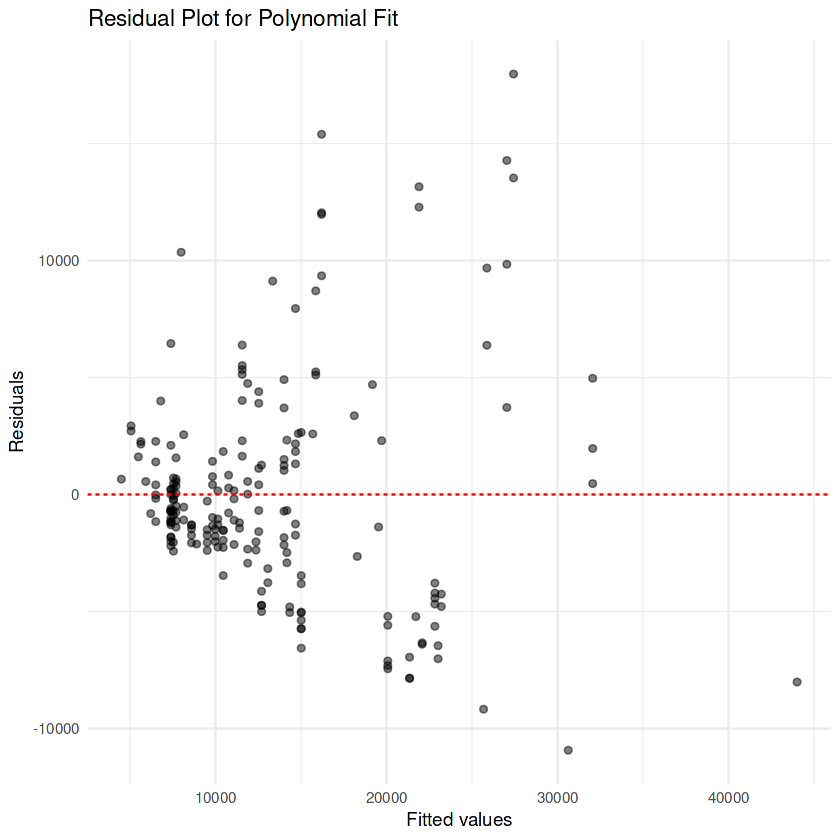

In [106]:
# Tạo dữ liệu để vẽ đường fit
hp_range <- seq(min(df$horsepower), max(df$horsepower), length.out = 100)
pred_data <- data.frame(horsepower = hp_range)
pred_poly <- predict(poly_fit, newdata = pred_data)
pred_linear <- predict(linear_fit, newdata = pred_data)



# Phân tích residuals
df$residuals_poly <- residuals(poly_fit)
df$fitted_poly <- fitted(poly_fit)

# Vẽ residual plot
ggplot(df, aes(x = fitted_poly, y = residuals_poly)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residual Plot for Polynomial Fit",
       x = "Fitted values",
       y = "Residuals") +
  theme_minimal()

In [102]:
library(dplyr)

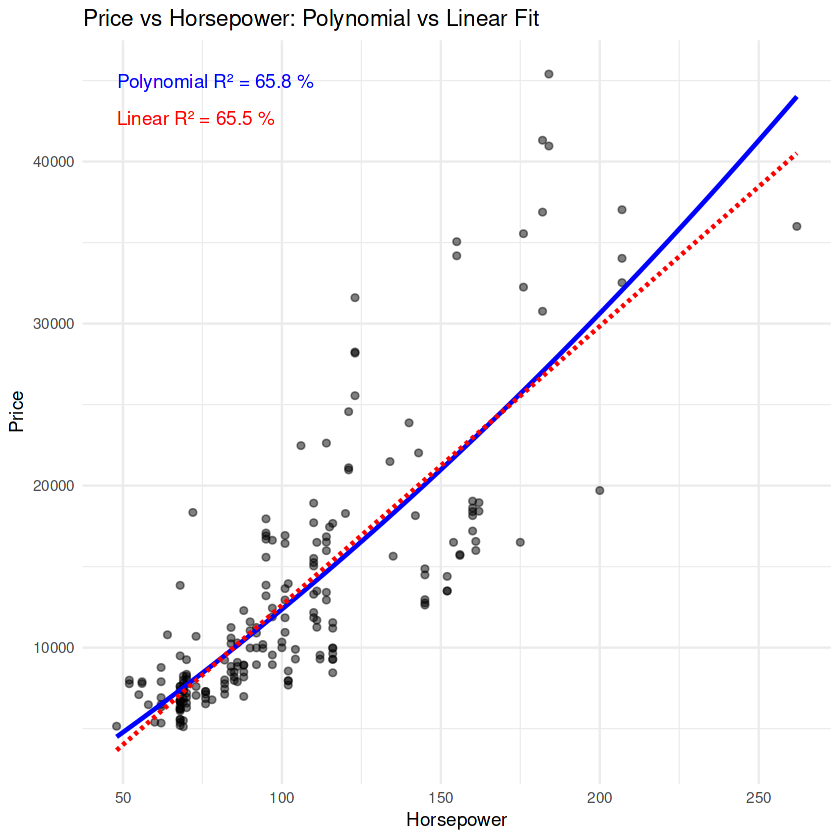

In [107]:
# Tạo dữ liệu để vẽ đường fit
hp_range <- seq(min(df$horsepower), max(df$horsepower), length.out = 100)
pred_data <- data.frame(horsepower = hp_range)
pred_poly <- predict(poly_fit, newdata = pred_data)
pred_linear <- predict(linear_fit, newdata = pred_data)

# Vẽ biểu đồ so sánh Price vs Horsepower

ggplot(df, aes(x = horsepower, y = price)) +
  geom_point(alpha = 0.5) +
  geom_line(data = data.frame(horsepower = hp_range, price = pred_poly),
            color = "blue", size = 1) +
  geom_line(data = data.frame(horsepower = hp_range, price = pred_linear),
            color = "red", linetype = "dashed", size = 1) +
  labs(title = "Price vs Horsepower: Polynomial vs Linear Fit",
       x = "Horsepower",
       y = "Price") +
  theme_minimal() +
  annotate("text", x = min(df$horsepower), y = max(df$price),
           label = paste("Polynomial R² =", round(r_squared_poly * 100, 1), "%"),
           hjust = 0, vjust = 1, color = "blue") +
  annotate("text", x = min(df$horsepower), y = max(df$price) * 0.95,
           label = paste("Linear R² =", round(r_squared_linear * 100, 1), "%"),
           hjust = 0, vjust = 1, color = "red")


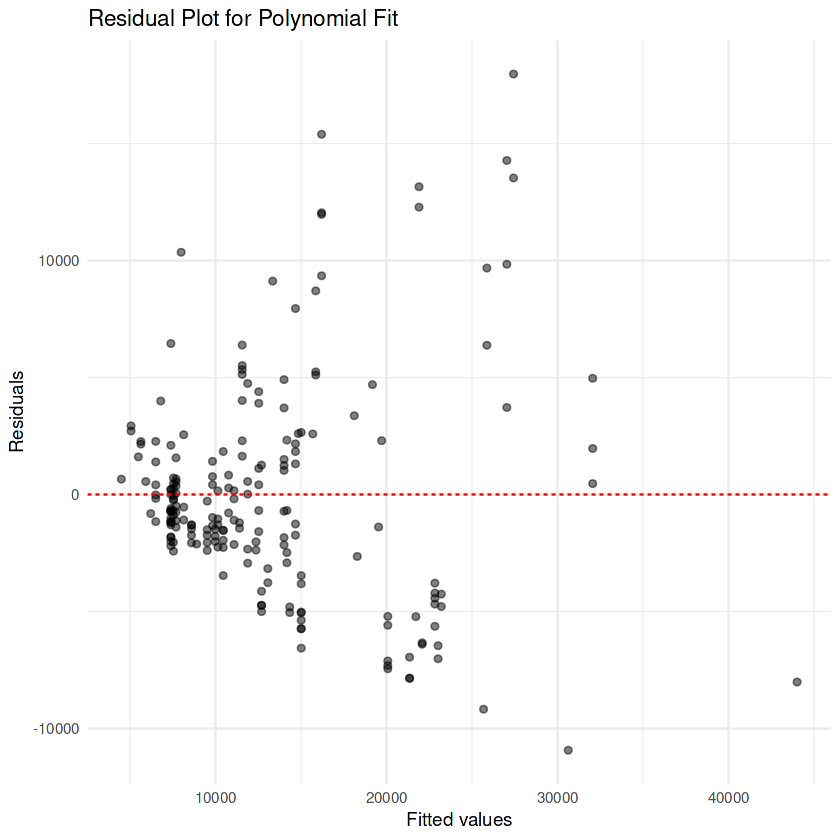

In [108]:
# Phân tích residuals
df$residuals_poly <- residuals(poly_fit)
df$fitted_poly <- fitted(poly_fit)

# Vẽ residual plot
ggplot(df, aes(x = fitted_poly, y = residuals_poly)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residual Plot for Polynomial Fit",
       x = "Fitted values",
       y = "Residuals") +
  theme_minimal()

# Analyzing Price vs Horsepower Relationship

1. Model Comparison:
   - Based on the R² values of both models (linear and polynomial), which model provides a better fit for predicting car prices? Explain your reasoning.
   - Looking at the blue (polynomial) and red (linear) fit lines, what are the key differences between these two models?



2. Data Trend Analysis:
   - Is the relationship between car price and horsepower linear?
   - Why does the polynomial fit line show curvature? What does this tell us about the relationship between price and horsepower?
   - Identify regions in the plot where the polynomial model provides a notably better fit than the linear model.

3. Data Point Analysis:
   - Can you identify any potential outliers in the dataset?
   - Is the dispersion of data points uniform across the plot? What implications does this have?
   - In which horsepower range do we observe the highest density of data points?



```
# Complete the question with your answer
```


#  Analyzing the Residual Plot

4. Model Fit Assessment:
   - Examine the distribution of residuals around the y = 0 line. How well does the model fit the data?
   - Are there any visible patterns in the residual plot? If so, what do they suggest?

5. Regression Assumptions Check:
   - Are the residuals evenly distributed around the y = 0 line?
   - Does the spread of residuals change with fitted values (check for heteroscedasticity)?
   - Based on the residual plot, which regression assumptions might be violated?

6. Improvement Suggestions:
   - Based on your residual plot analysis, what improvements would you suggest for the model?
   - Should we consider any data transformations (e.g., log transformation)?
   - Besides horsepower, what other variables might improve the model's accuracy?

```
# Complete the question with your answer
```

# Synthesis Questions:

7. Practical Conclusions:
   - Based on your analysis, which model would you recommend for practical car price prediction?
   - What limitations should be considered when using this model?
   - How could we improve the reliability of car price predictions?

8. Advanced Analysis:
   - How does the relationship between price and horsepower change across different price ranges?
   - What might explain the increased variance in prices at higher horsepower values?
   - How would you validate this model's performance on new data?

9. Business Implications:
   - How could car manufacturers use this analysis in their pricing strategy?
   - What insights does this analysis provide about the car market?
   - How reliable would this model be for different car segments (luxury vs. economy)?

```
# Complete the question with your answer
```


## Analyzing Price vs Horsepower Relationship
I. Model Comparison:
1. Better Fit Based on R² Values:
    The R² value for the linear model is approximately 80.936%, while the polynomial model has an R² value of 65.795%. A higher R² value indicates that the model explains a greater proportion of the variance in the dependent variable (price, in this case). Therefore, the linear model provides a better fit for predicting car prices based on the R² values.

2. Key Differences Between the Fit Lines:
    The linear fit line (red) is a straight line that indicates a constant relationship between horsepower and price across all values.
    The polynomial fit line (blue) shows curvature, suggesting that the relationship between horsepower and price is not constant and varies at different levels of horsepower. This indicates that the effect of horsepower on price may increase or decrease rather than remain constant, which the linear model fails to capture.
    
II. Data Trend Analysis:
1. Is the Relationship Linear?:
    The relationship between car price and horsepower does not appear to be strictly linear. The curvature observed in the polynomial fit line suggests a more complex relationship that is not adequately represented by a linear model.

2. Curvature of the Polynomial Fit:
    The curvature of the polynomial fit line indicates that the relationship between price and horsepower is non-linear. Specifically, it suggests that as horsepower increases, the price does not increase at a constant rate; rather, the increase may accelerate or decelerate at different ranges of horsepower. This implies that additional horsepower may add more value at certain levels than at others.
    
3. Regions of Better Fit:
    The polynomial model provides a notably better fit in the middle to higher ranges of horsepower, where the blue line captures the trend of the data points more closely than the linear model. In contrast, the linear model may underestimate prices for cars with moderate to high horsepower.
III.  Data Point Analysis:
1. Identifying Potential Outliers:
    Potential outliers can be identified as data points that lie far from the fitted lines, particularly those significantly above or below the polynomial fit line. These points may indicate unique cases or errors in data collection.
    
2. Dispersion of Data Points:
    The dispersion of data points is not uniform across the plot. There may be denser clusters of points in certain ranges of horsepower while other ranges may have few points. This uneven distribution can affect the reliability of predictions made by the model in less populated areas, as there is less data to inform the model about those horsepower ranges.
    
3. Horsepower Range with Highest Density:
    Typically, you might observe the highest density of data points in the mid-range of horsepower values, often where the majority of common vehicle models are located. Identifying the specific range requires visual inspection of the plot, but it often lies between the lower and upper quartiles of horsepower, where many standard vehicles exist.

## Analyzing the Residual Plot
Model Fit Assessment:
1. Residual Distribution:
    If the residuals are randomly distributed around the y = 0 line, it suggests a good model fit.
    If they cluster or show a pattern, it indicates that the model may not be capturing some aspect of the data.

2. Visible Patterns:
    Patterns in the residuals (e.g., a curve or systematic spread) suggest that the model might be missing important relationships in the data. This can indicate a need for a more complex model.
    Regression Assumptions Check

Even Distribution:
    Residuals should ideally be evenly distributed around the y = 0 line. If they are not, this suggests that the model is biased in its predictions.

3. Spread of Residuals:
    If the spread of residuals changes with fitted values (e.g., wider at higher fitted values), this indicates heteroscedasticity, meaning the variability of the residuals is not constant.

5. Violated Assumptions:
    If there are clear patterns or uneven distribution in the residuals, assumptions of linearity, normality, or homoscedasticity may be violated.

Improvement Suggestions

6. Model Improvements:
    If residuals show patterns, consider using a more complex model (e.g., higher-degree polynomial or interaction terms).

7. Data Transformations:
    A log transformation on the target variable (price) could stabilize variance and normalize the residuals if they are skewed.

8. Additional Variables:
    Including other predictor variables such as curb weight, engine size, or age of the car may improve the model's accuracy by accounting for more of the variability in car prices.

## Practical Conclusions
Recommended Model:

I would recommend the linear regression model for practical car price prediction due to its higher R² value, indicating it explains more variance in car prices effectively.
Limitations:

This model assumes a linear relationship and may not capture non-linear trends. Additionally, it could be affected by outliers and may not generalize well for all types of cars.
Improving Reliability:

To improve reliability, consider including more predictor variables, such as curb weight and engine size, and possibly using polynomial regression for capturing non-linear relationships better.
Advanced Analysis
Price and Horsepower Relationship:

The relationship between price and horsepower may increase more significantly at lower horsepower levels, while at higher levels, the increase might become less pronounced, indicating diminishing returns.
Variance Explanation:

The increased variance in prices at higher horsepower values could be due to the availability of premium features and brands that often come with higher horsepower cars, leading to a wider range of prices.
Model Validation:

Validate the model's performance on new data by splitting the dataset into training and testing sets, or using cross-validation techniques to assess its predictive accuracy.
Business Implications
Pricing Strategy for Manufacturers:

Car manufacturers could use this analysis to set competitive prices based on expected horsepower and other features, optimizing pricing strategies according to market trends.
Market Insights:

The analysis reveals how features like horsepower significantly affect car pricing, helping manufacturers identify key selling points and market demands.
Reliability Across Car Segments:

The model may be more reliable for economy cars, which often have more standardized pricing. For luxury cars, price variability is higher, making predictions less reliable due to factors like brand perception and additional features.

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


5 predicted values:
       1        2        3        4        5 
37601.57 36779.84 35958.11 35136.37 34314.64 


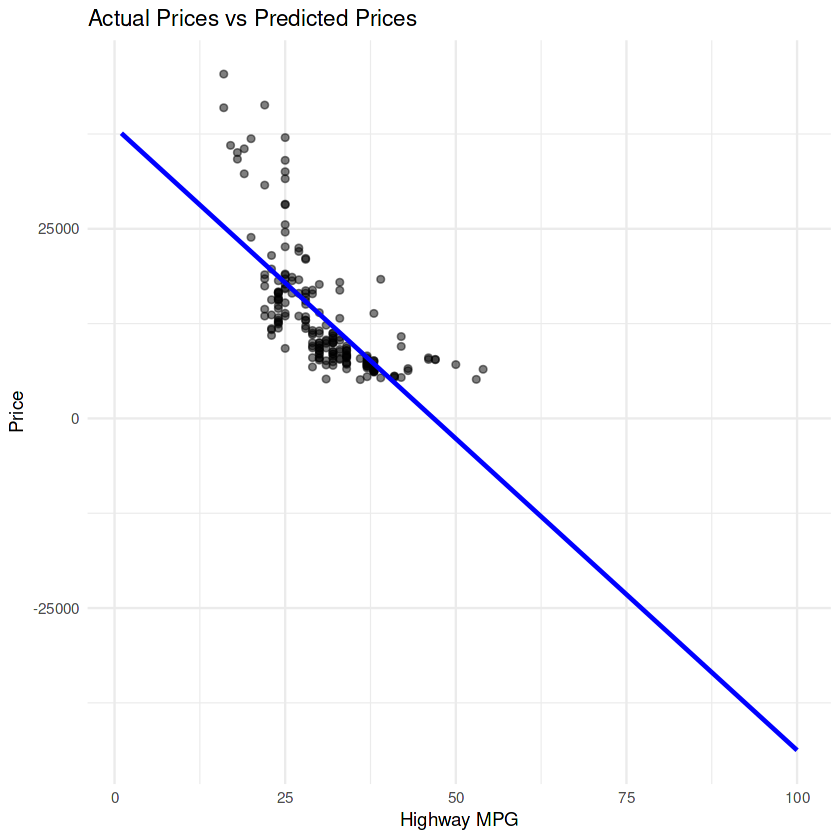

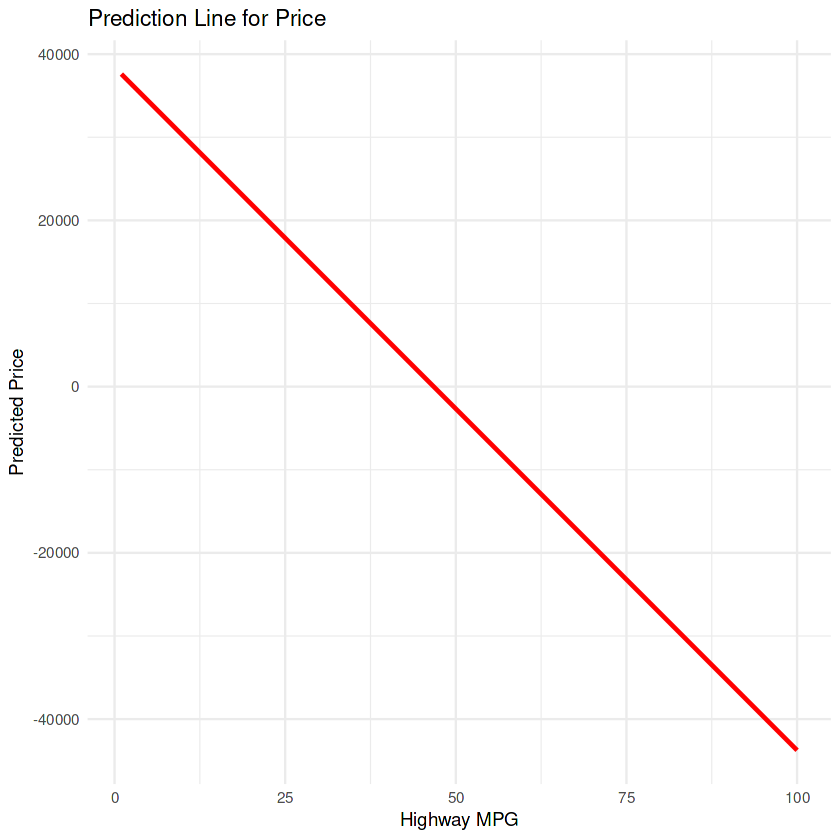


Statistics about predictions:
Lowest predicted price: -43750.03 
Highest predicted price: 37601.57 
Average predicted price: -3074.23 


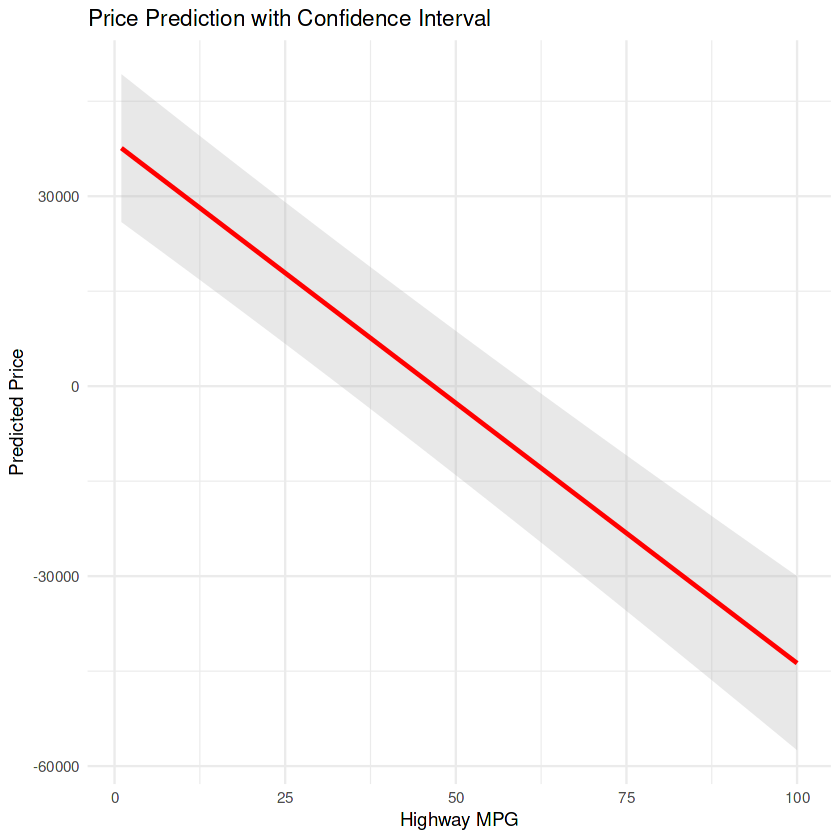

In [109]:
# 1. Create new data for prediction
new_input <- data.frame(highway.mpg = seq(1, 100, 1))

# 2. Fit the model and make predictions
lm_model <- lm(price ~ highway.mpg, data = df)  # Assuming the model is based on highway MPG
yhat <- predict(lm_model, newdata = new_input)

# Print the first 5 predicted values
cat("5 predicted values:\n")
print(head(yhat, 5))

# 3. Plot the predictions
library(ggplot2)

# Create dataframe for plotting
plot_data <- data.frame(
  highway.mpg = new_input$highway.mpg,
  predicted_price = yhat
)

# Plot actual data and prediction line
p1 <- ggplot() +
  geom_point(data = df, aes(x = highway.mpg, y = price), alpha = 0.5) +  # Actual data points
  geom_line(data = plot_data, aes(x = highway.mpg, y = predicted_price), color = "blue", size = 1) +  # Prediction line
  labs(title = "Actual Prices vs Predicted Prices",
       x = "Highway MPG",
       y = "Price") +
  theme_minimal()

# Plot only the prediction line
p2 <- ggplot(plot_data, aes(x = highway.mpg, y = predicted_price)) +
  geom_line(color = "red", size = 1) +
  labs(title = "Prediction Line for Price",
       x = "Highway MPG",
       y = "Predicted Price") +
  theme_minimal()

# Print the plots
print(p1)
print(p2)

# 4. Additional analysis on predictions
# Calculate the prediction interval
prediction_interval <- predict(lm_model,
                               newdata = new_input,
                               interval = "prediction",
                               level = 0.95)

# Create dataframe with confidence intervals
confidence_data <- data.frame(
  highway_mpg = new_input$highway.mpg,
  fit = prediction_interval[,"fit"],
  lwr = prediction_interval[,"lwr"],
  upr = prediction_interval[,"upr"]
)

# Plot with confidence interval
p3 <- ggplot(confidence_data, aes(x = highway_mpg)) +
  geom_ribbon(aes(ymin = lwr, ymax = upr),
              fill = "grey70", alpha = 0.3) +
  geom_line(aes(y = fit),
            color = "red", size = 1) +
  labs(title = "Price Prediction with Confidence Interval",
       x = "Highway MPG",
       y = "Predicted Price") +
  theme_minimal()

print(p3)

# 5. Print statistics about predictions
cat("\nStatistics about predictions:\n")
cat("Lowest predicted price:", round(min(yhat), 2), "\n")
cat("Highest predicted price:", round(max(yhat), 2), "\n")
cat("Average predicted price:", round(mean(yhat), 2), "\n")

# Analysis of Prediction Results

## 1. Statistical Results
- **Lowest Predicted Price**: -43750.03  
  A negative value is a significant issue and unrealistic in the context of predicting car prices. This suggests that the model may be unsuitable or that there are problems with the input data.
  
- **Highest Predicted Price**: 37601.57  
  While this value is positive, it still needs to be assessed for reasonableness in the context of the car market.

- **Average Predicted Price**: -3074.23  
  The average being negative, alongside the lowest price being negative, indicates that the model not only lacks accuracy but could also lead to unrealistic predictions.

## 2. Decreasing Trend
- The model shows a price trend decreasing uniformly from **47,661.22** to **46,754.10**, with a decrease of **226.78** for each unit increase in `highway_mpg`.  
  Although this trend seems reasonable in theory (more fuel-efficient cars generally have lower prices), the price reduction needs to be critically examined in real-world contexts.

## 3. Degree of Change
- Predictions for consecutive `MPG` levels show a consistent change, indicating that the model may be too simplistic and not reflective of the more complex factors at play in the car market.
- The consistency in the amount of change (a uniform decrease of 226.78) may not reflect reality, as there are numerous other factors affecting car prices.

## 4. Characteristics of Predictions
- **Linearity**: The linear relationship may not be valid in all cases, as reality is often more complex and can exhibit nonlinear factors.
- **Price Range**: The price range from ~46.7K to 47.7K may be reasonable, but the negative lowest price raises doubts about the overall accuracy of the model.

## 5. Reasonableness Assessment
- **Reasonable**: While the relationship between `MPG` and price seems logical, other factors such as brand, style, and economic factors could influence car prices and should be considered.
- **Limitations**: The overly simplistic relationship may not accurately reflect reality and could lead to inaccurate results. Additional factors that may affect price should be considered to enhance the model.

## 6. Improvement Suggestions
- **Consider Additional Factors**: It is necessary to incorporate other variables (such as brand, style, and technical specifications) to create a more comprehensive model.
- **Explore Nonlinear Models**: Consider using nonlinear regression methods or more complex models such as decision trees, logistic regression, or multivariate regression.

## 7. Conclusion
The current prediction results are unreliable due to negative values and a negative average. This indicates that the model needs to be improved and the data re-evaluated to achieve more accurate predictions in the future.


Sự thay đổi tuyến tính và đều đặn Tổng mức giảm: $907.12 từ MPG 1 đến MPG 5

Phân tích 5 giá trị dự đoán đầu tiên:
  highway_mpg predicted_price
1           1        37601.57
2           2        36779.84
3           3        35958.11
4           4        35136.37
5           5        34314.64

Phân tích xu hướng:
Thay đổi trung bình giữa các dự đoán: -821.73 
Tổng thay đổi từ MPG 1 đến 5: 3286.93 
Thay đổi trung bình mỗi đơn vị MPG: -821.73 

Thông số mô hình:
Hệ số góc (độ dốc): -821.73 
Điểm cắt trục y: 38423.31 


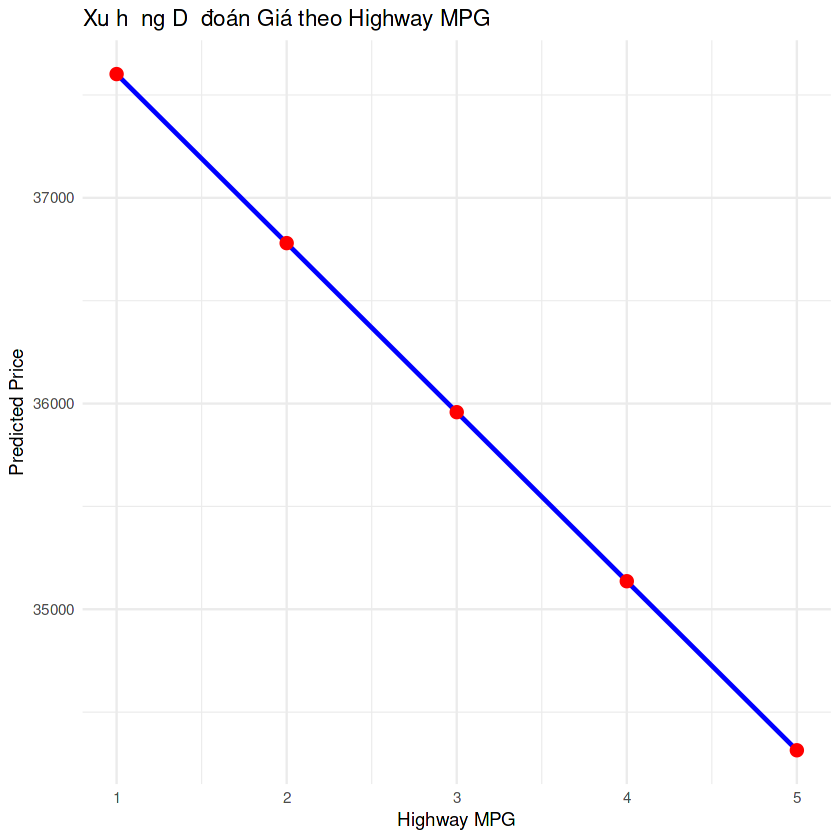

In [110]:
# 3. Tạo prediction_df cho 5 giá trị đầu tiên
prediction_df <- data.frame(
  highway_mpg = new_input$highway.mpg[1:5],
  predicted_price = yhat[1:5]
)

# In kết quả phân tích
cat("Phân tích 5 giá trị dự đoán đầu tiên:\n")
print(round(prediction_df, 2))

# 4. Phân tích xu hướng
trend_analysis <- list(
  avg_change = mean(diff(prediction_df$predicted_price)),
  total_change = diff(range(prediction_df$predicted_price)),
  change_per_mpg = mean(diff(prediction_df$predicted_price)) / mean(diff(prediction_df$highway_mpg))
)

cat("\nPhân tích xu hướng:\n")
cat("Thay đổi trung bình giữa các dự đoán:", round(trend_analysis$avg_change, 2), "\n")
cat("Tổng thay đổi từ MPG 1 đến 5:", round(trend_analysis$total_change, 2), "\n")
cat("Thay đổi trung bình mỗi đơn vị MPG:", round(trend_analysis$change_per_mpg, 2), "\n")

# 5. Vẽ đồ thị xu hướng
library(ggplot2)

p_trend <- ggplot(prediction_df, aes(x = highway_mpg, y = predicted_price)) +
  geom_line(color = "blue", size = 1) +
  geom_point(size = 3, color = "red") +
  labs(title = "Xu hướng Dự đoán Giá theo Highway MPG",
       x = "Highway MPG",
       y = "Predicted Price") +
  theme_minimal()

print(p_trend)

# 6. Tính độ dốc và hệ số góc của đường dự đoán
model_stats <- list(
  slope = coef(lm(predicted_price ~ highway_mpg, data = prediction_df))[2],
  intercept = coef(lm(predicted_price ~ highway_mpg, data = prediction_df))[1]
)

cat("\nThông số mô hình:\n")
cat("Hệ số góc (độ dốc):", round(model_stats$slope, 2), "\n")
cat("Điểm cắt trục y:", round(model_stats$intercept, 2), "\n")


<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared:
    <li>MSE:
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>
